# Descriptive statistics problems

### Exercise 1

We will use NumPy to obtain information to describe statistically.

- Generate an array of 100 elements following a normal distribution.
- Generate an array of 100 elements following a chi-square distribution with 3 degrees of freedom.
- Calculate the main metrics and statistical measures that best describe the two vectors.

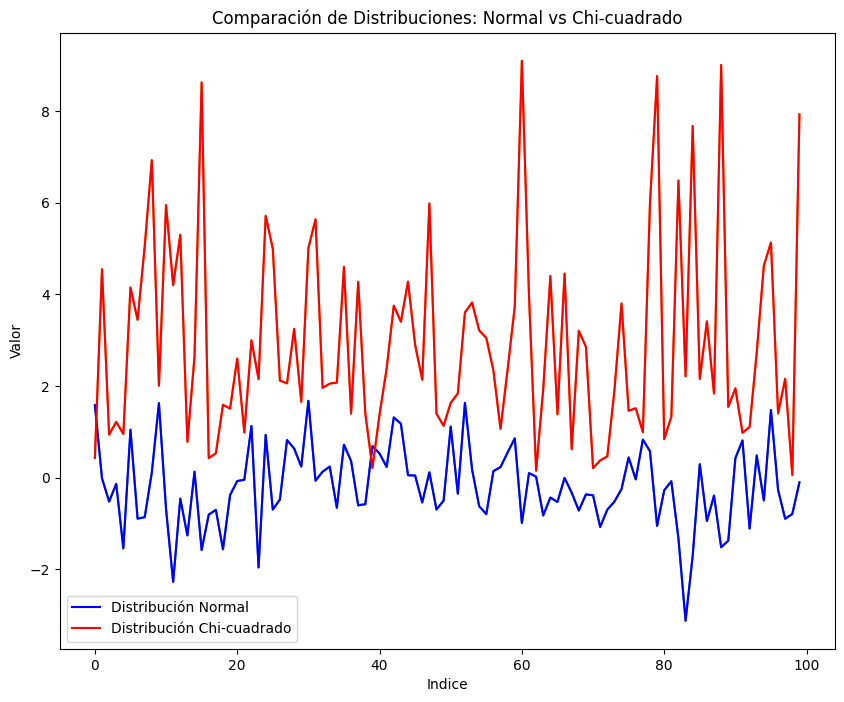

In [88]:
# TODO
import numpy as np
import scipy.stats
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import mode, kurtosis, skew

# Generate an array of 100 elements following a normal distribution.
normal = np.random.normal(loc=0, scale=1, size=100)

# Generate an array of 100 elements following a chi-square distribution with 3 degrees of freedom.
chisquare = np.random.chisquare(df=3, size=100)

# Ponerlo en DF, para sacar misma info que como en clase:
df = pd.DataFrame({'Normal': normal,'Chi-Square': chisquare})

#Vizualisamos :
plt.figure(figsize=(10, 8)) 
plt.plot(df)
plt.plot(df['Normal'], label='Distribución Normal', color='blue')
plt.plot(df['Chi-Square'], label='Distribución Chi-cuadrado', color='red')
plt.title("Comparación de Distribuciones: Normal vs Chi-cuadrado")
plt.xlabel("Indice")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [89]:
df.head()

,Normal,Chi-Square
0,1.586542,0.433148
1,-0.013653,4.549353
2,-0.520188,0.940360
3,-0.132695,1.218363
4,-1.540844,0.955337


In [90]:
df.tail()

,Normal,Chi-Square
95,1.478137,5.131308
96,-0.266547,1.402544
97,-0.895152,2.157843
98,-0.791203,0.058924
99,-0.101099,7.928597


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Normal,100.0,-0.191138,0.885232,-3.120537,-0.699646,-0.257984,0.312348,1.678452
Chi-Square,100.0,2.960039,2.158307,0.058924,1.398062,2.185906,4.219670,9.099994


In [92]:
#Intento hacer esa tabla también con numpy para practicar : 

# Media: 
media_normal = normal.mean()
print("Promedio de distrib normal:", media_normal)
    #otra ocpion para X2:
media_X2 = np.mean(chisquare)
print(f"Promedio de X2: {media_X2}")

Promedio de distrib normal: -0.19113786497494542
Promedio de X2: 2.960038868058645


In [93]:
#Variance y Std = desviación estándar (= ECART TYPE = racine carrée de la vraiance)

N_n = len(normal)

variance_normal = np.sum((normal - media_normal) ** 2) / (len(normal) - 1)
std_normal = np.sqrt(variance_normal)

print("Desviación estándar de la distribución normal:", std_normal)

N_X2 = len(chisquare)

variance_X2 = np.sum((chisquare - media_X2) ** 2) / (len(chisquare) - 1)
std_X2 = np.sqrt(variance_X2)

print("Desviación estándar de la distribución chisquare:", std_X2)



Desviación estándar de la distribución normal: 0.8852316534331292
Desviación estándar de la distribución chisquare: 2.1583071202677773


In [94]:
#Coef de var (desviacion / media*100)

var_normal = (std_normal / media_normal) * 100
var_X2 = (std_X2 / media_X2) * 100

print(f"Coeficiente de variación de distrib normal: {var_normal:.2f}%")
print(f"Coeficiente de variación de distrib X2: {var_X2:.2f}%")



Coeficiente de variación de distrib normal: -463.14%
Coeficiente de variación de distrib X2: 72.91%


In [95]:

# Min y Max

print(f"Min de la distrib normal: {normal.min()}")

print(f"Mxn de la distrib normal: {normal.max()}")

print(f"Min de la distrib X2: {chisquare.min()}")

print(f"Max de la distrib normal: {chisquare.max()}")

#o sino con el DF :
print(df.min(),df.max())

#Rango - 2 ocpiones : 
print(f"Rango de la distrib normal: {normal.max() - normal.min()}")
print(f"Rango de la distrib chisquare: {np.ptp(chisquare)}")



Min de la distrib normal: -3.120536634455233
Mxn de la distrib normal: 1.6784522259470942
Min de la distrib X2: 0.05892447024783914
Max de la distrib normal: 9.099993884751388
Normal       -3.120537
Chi-Square    0.058924
dtype: float64 Normal        1.678452
Chi-Square    9.099994
dtype: float64
Rango de la distrib normal: 4.798988860402328
Rango de la distrib chisquare: 9.041069414503548


In [96]:
#Cuartiles y mediana :

Q1_normal = np.percentile(normal, 25)
Q2_normal = np.percentile(normal, 50)
Q3_normal = np.percentile(normal, 75)

print(f"Primer cuartil (Q1): {Q1_normal}")
print(f"Mediana (Q2): {Q2_normal}")
print(f"Tercer cuartil (Q3): {Q3_normal}")

Q1_X2 = np.quantile(chisquare, 0.25)
Q2_X2 = np.quantile(chisquare, 0.50)
Q3_X2 = np.quantile(chisquare, 0.75)

print(f"Primer cuartil (Q1): {Q1_X2}")
print(f"Mediana (Q2): {Q2_X2}")
print(f"Tercer cuartil (Q3): {Q3_X2}")


#Calculo Mediana

mediana_normal = np.median(normal)
print("Mediana de la distrib normal:", mediana_normal)

    # otra opción :
#Vamos a ordernar la distrib:   
sort_X2 = sorted(chisquare)

def mediana(N_X2):
    if N_X2 % 2 == 1:  
        return sort_X2[N_X2 // 2]  
    else:
        return (sort_X2[N_X2 // 2 - 1] + sort_X2[N_X2 // 2]) / 2
    
print("Mediana de la distrib X2:", mediana(N_X2))

#Con Dataframe:
print(df.median())



 

Primer cuartil (Q1): -0.6996462018440367
Mediana (Q2): -0.2579839376603625
Tercer cuartil (Q3): 0.3123482876195816
Primer cuartil (Q1): 1.3980619627525757
Mediana (Q2): 2.1859057315120882
Tercer cuartil (Q3): 4.219670223849486
Mediana de la distrib normal: -0.2579839376603625
Mediana de la distrib X2: 2.1859057315120882
Normal       -0.257984
Chi-Square    2.185906
dtype: float64


In [97]:
#Moda : valores que más se repiten en el conjunto de datos
moda_normal = mode(normal)
moda_X2 = mode(chisquare)

print("Moda de la distribución normal:", moda_normal.mode, "con frecuencia:", moda_normal.count)
print("Moda de la distribución chi-cuadrado:", moda_X2.mode, "con frecuencia:", moda_X2.count)
print("No hay valores que se repiten.")


Moda de la distribución normal: -3.120536634455233 con frecuencia: 1
Moda de la distribución chi-cuadrado: 0.05892447024783914 con frecuencia: 1
No hay valores que se repiten.


In [102]:
# Correlación : 
df.corr()

,Normal,Chi-Square
Normal,1.000000,-0.087605
Chi-Square,-0.087605,1.000000


In [99]:
#Kurtosis ("altura" de los picos de la distribución): 
print(kurtosis(normal))
print(kurtosis(chisquare))

#Juntos :
print(kurtosis(df))

0.4734715094521871
0.6049272531836318
[0.47347151 0.60492725]


In [100]:
#Skew (asimetría de la distribución de los datos. Sesgo + = la cola de la distribución se extiende hacia la derecha (valores más grandes),sesgo - --> indica lo contrario.): 
print(skew(normal))
print(skew(chisquare))

#Juntos :
print(skew(df))

-0.17345396826069612
1.052896688462046
[-0.17345397  1.05289669]


### Exercise 2

Write a Python program to calculate the standard deviation of the following data:

```py
data = [4, 2, 5, 8, 6]
```

In [101]:
# TODO

#Variance y Std = desviación estándar (ECART TYPE = racine carrée de la vraiance)
data = [4, 2, 5, 8, 6]
N = len(data)

media = np.mean(data)
variance = np.sum((data - media) ** 2) / (N - 1) 
std_dev = np.sqrt(variance)

print("Desviación estándar:", std_dev)

Desviación estándar: 2.23606797749979
